In [1]:
# Importing libraries

# data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
test = pd.read_csv('../input/spaceship-titanic/test.csv')
train = pd.read_csv('../input/spaceship-titanic/train.csv')

test.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


# Preprocessing

In [3]:
data = [train, test]

for dataset in data:
    dataset.info()
    print('#', 50*'-')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
# --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (t

8693 observations in the train data

4277 observations in the test data

Together we have the following variables:
* PassengerID: Object
* HomePlanet: Object (Factor)
* CryoSleep: Object (True or False)
* Cabin: Object (Factor)
* Destination: Object (Factor)
* Age: Numeric (Continuous)
* VIP: Object (Mostly False, some True and some null)
* Room Service: Numeric (Continuous)
* Food Court: Numeric (Continuous)
* Shopping Mall: Numeric (Continuous)
* Spa: Numeric (Continuous)
* VRDeck: Numeric (Continuous)
* Name: Object
* Transported: Object (True or False)


Let's get summary stats for each variable and recode the Transported variable so we can do better group by analysis

In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [6]:
train.Transported = train.Transported.map({True: 0, False: 1})

## Groupby
Doing group-by analysis based on different factor variables

In [7]:
train[['HomePlanet', 'Transported']].groupby(['HomePlanet']).mean().sort_values(by='Transported', ascending=False)

,Transported
HomePlanet,
Earth,0.576054
Mars,0.476976
Europa,0.341154


In [8]:
train[['CryoSleep', 'Transported']].groupby(['CryoSleep']).mean()

,Transported
CryoSleep,
False,0.671079
True,0.182417


In [9]:
train[['Destination', 'Transported']].groupby(['Destination']).mean()

,Transported
Destination,
55 Cancri e,0.390000
PSO J318.5-22,0.496231
TRAPPIST-1e,0.528825


In [10]:
train[['VIP', 'Transported']].groupby(['VIP']).mean()

,Transported
VIP,
False,0.493668
True,0.618090


Clearly some large differences between these different factors.

## Visualization
Let's plot age differences based on survivalship

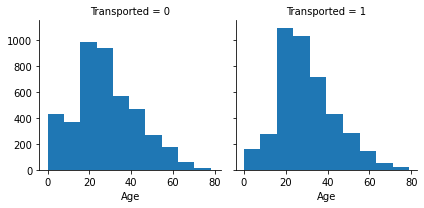

In [11]:
plot = sns.FacetGrid(train, col = "Transported")
plot.map(plt.hist, 'Age')

Does not appear to be any major visual differences between the two

Lets do the same for the spending categories

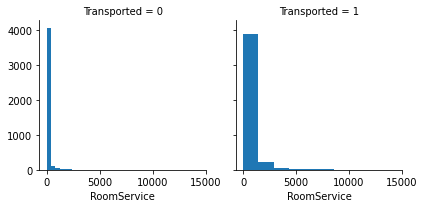

In [12]:
plot.map(plt.hist, "RoomService")

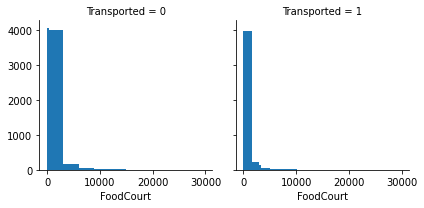

In [13]:
plot.map(plt.hist, "FoodCourt")

All of these variables are highly skewed and difficult to analyze

Checking to see if skewness can be attributed to VIP status

In [14]:
train[['VIP', 'RoomService']].groupby(['VIP']).mean()

,RoomService
VIP,
False,217.218527
True,473.615385


In [15]:
train[['VIP', 'FoodCourt']].groupby(['VIP']).mean()

,FoodCourt
VIP,
False,426.336536
True,1811.393782


Does appear to be some significant differences for spending based on VIP status.

Lets make the (dangerous) assumption that spending can be attributed to VIP status, and revisit this later.

## Calculating bands of some continuous variables

Creating some age bands

In [16]:
train['Ageband'] = pd.cut(train['Age'],6)

train[["Ageband", "Transported"]].groupby("Ageband").mean()

,Transported
Ageband,
"(-0.079, 13.167]",0.328405
"(13.167, 26.333]",0.520671
"(26.333, 39.5]",0.524287
"(39.5, 52.667]",0.499594
"(52.667, 65.833]",0.505535
"(65.833, 79.0]",0.523810


In [17]:
train["RoomServiceband"] = pd.cut(train['RoomService'], 6)

train[["RoomServiceband", "Transported", "VIP"]].groupby(["RoomServiceband", "VIP"]).mean()

Transported
RoomServiceband       VIP               
(-14.327, 2387.833]   False     0.485721
                      True      0.589189
(2387.833, 4775.667]  False     0.900000
                      True      1.000000
(4775.667, 7163.5]    False     1.000000
                      True      1.000000
(7163.5, 9551.333]    False     1.000000
                      True      1.000000
(9551.333, 11939.167] False     1.000000
                      True           NaN
(11939.167, 14327.0]  False     1.000000
                      True           NaN

Interestingly, many of the abnormally high spenders were not VIP passengers.

For the sake of simplicity, lets drop the spending variables from the dataset and come back to it later

In [18]:
train = train.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "RoomServiceband"], axis=1)
test = test.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)
    
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,Ageband
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,1,"(26.333, 39.5]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,0,"(13.167, 26.333]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,1,"(52.667, 65.833]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,1,"(26.333, 39.5]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,0,"(13.167, 26.333]"


## Analyzing Cabin Variable

Cabin is split up into three parts: deck, number, and side. Lets separate the deck number and side and analyze them as individual variables

In [19]:
train['Deck'] = train.Cabin.astype(str).str[0]
train['Deck'] = train.Deck.replace('n', np.nan)

train[['Deck', 'Transported']].groupby('Deck').mean()

,Transported
Deck,
A,0.503906
B,0.265725
C,0.319946
D,0.566946
E,0.642694
F,0.560129
G,0.483783
T,0.800000


In [20]:
train['Side'] = train.Cabin.astype(str).str[-1]
train['Side'] = train.Side.replace('n', np.nan)

train[['Side', 'Transported']].groupby('Side').mean()

,Transported
Side,
P,0.548740
S,0.444963


There seems to be some differences here, so we can keep these variables for the analysis and drop the `Cabin` variable

In [21]:
test['Deck'] = test.Cabin.astype(str).str[0]
test['Deck'] = test.Deck.replace('n', np.nan)

print(test.Cabin)

test['Side'] = test.Cabin.astype(str).str[-1]
test['Side'] = test.Side.replace('n', np.nan)

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

data = [train, test]
test.head()

0          G/3/S
1          F/4/S
2          C/0/S
3          C/1/S
4          F/5/S
          ...   
4272    G/1496/S
4273         NaN
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 4277, dtype: object


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Deck,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,Nelly Carsoning,G,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,Lerome Peckers,F,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,Sabih Unhearfus,C,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,Meratz Caltilter,C,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,Brence Harperez,F,S


## Filling in NA Values

In [22]:
for dataset in data:
    for col in dataset.columns:
        print(f"Number of missing values in {col}: {dataset[col].isna().sum()}")
    print("#", 50*'-')

Number of missing values in PassengerId: 0
Number of missing values in HomePlanet: 201
Number of missing values in CryoSleep: 217
Number of missing values in Destination: 182
Number of missing values in Age: 179
Number of missing values in VIP: 203
Number of missing values in Name: 200
Number of missing values in Transported: 0
Number of missing values in Ageband: 179
Number of missing values in Deck: 199
Number of missing values in Side: 199
# --------------------------------------------------
Number of missing values in PassengerId: 0
Number of missing values in HomePlanet: 87
Number of missing values in CryoSleep: 93
Number of missing values in Destination: 92
Number of missing values in Age: 91
Number of missing values in VIP: 93
Number of missing values in Name: 94
Number of missing values in Deck: 100
Number of missing values in Side: 100
# --------------------------------------------------


All variables except for `PassengerID` and `Transported` have null values that need to be filled.

Lets randomly assign the missing values based on the frequency of the existing variables.
Special thanks to [this stack overflow thread](https://stackoverflow.com/questions/63548053/python-fill-missing-values-according-to-frequency) for this code - it's very handy!

In [23]:
# prob = train['HomePlanet'].value_counts(normalize=True)
# train['HomePlanet'] = train['HomePlanet']
# train.loc[train.HomePlanet.isna(), 'HomePlanet'] = np.random.choice(prob.index, p = prob.values, size = train.HomePlanet.isna().sum())

# train.HomePlanet.isna().sum()

In [24]:
for dataset in data:
    for col in dataset.columns:
        if col == 'PassengerID' or col == 'Transported':
            continue
        prob = dataset[col].value_counts(normalize=True)
        dataset.loc[dataset[col].isna(), col] = np.random.choice(prob.index, p=prob.values, size=dataset[col].isna().sum())
    
for dataset in data:
    for col in dataset.columns:
        print(f"Number of missing values in {col}: {dataset[col].isna().sum()}")
    print("#", 50*'-')

Number of missing values in PassengerId: 0
Number of missing values in HomePlanet: 0
Number of missing values in CryoSleep: 0
Number of missing values in Destination: 0
Number of missing values in Age: 0
Number of missing values in VIP: 0
Number of missing values in Name: 0
Number of missing values in Transported: 0
Number of missing values in Ageband: 0
Number of missing values in Deck: 0
Number of missing values in Side: 0
# --------------------------------------------------
Number of missing values in PassengerId: 0
Number of missing values in HomePlanet: 0
Number of missing values in CryoSleep: 0
Number of missing values in Destination: 0
Number of missing values in Age: 0
Number of missing values in VIP: 0
Number of missing values in Name: 0
Number of missing values in Deck: 0
Number of missing values in Side: 0
# --------------------------------------------------


In [25]:
for dataset in data:
    dataset.info()
    print('#', 50*'-')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  8693 non-null   object  
 1   HomePlanet   8693 non-null   object  
 2   CryoSleep    8693 non-null   object  
 3   Destination  8693 non-null   object  
 4   Age          8693 non-null   float64 
 5   VIP          8693 non-null   object  
 6   Name         8693 non-null   object  
 7   Transported  8693 non-null   int64   
 8   Ageband      8693 non-null   category
 9   Deck         8693 non-null   object  
 10  Side         8693 non-null   object  
dtypes: category(1), float64(1), int64(1), object(8)
memory usage: 688.2+ KB
# --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Looks good!

Finally, lets reassign the variables as numeric factors before we do the final analysis

## Factor reassignment

In [26]:
# Home Planet
homeplanet_mapping = {"Earth": 1, "Mars": 2, "Europa": 3}
for dataset in data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map(homeplanet_mapping)
    
# CryoSleep
cryosleep_mapping = {False: 0, True: 1}
for dataset in data:
    dataset['CryoSleep'] = dataset['CryoSleep'].map(cryosleep_mapping)

# Destination
destination_mapping = {'TRAPPIST-1e': 1, "55 Cancri e": 2, "PSO J318.5-22":3}
for dataset in data:
    dataset['Destination'] = dataset['Destination'].map(destination_mapping)

# VIP
vip_mapping = {False: 0, True: 1}
for dataset in data:
    dataset['VIP'] = dataset['VIP'].map(vip_mapping)
    
# Deck
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
for dataset in data:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)
    
# Side
side_mapping = {'P': 1, 'S': 2}
for dataset in data:
    dataset['Side'] = dataset['Side'].map(side_mapping)

In [27]:
test.head(20)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Deck,Side
0,0013_01,1,1,1,27.0,0,Nelly Carsoning,7,2
1,0018_01,1,0,1,19.0,0,Lerome Peckers,6,2
2,0019_01,3,1,2,31.0,0,Sabih Unhearfus,3,2
3,0021_01,3,0,1,38.0,0,Meratz Caltilter,3,2
4,0023_01,1,0,1,20.0,0,Brence Harperez,6,2
5,0027_01,1,0,1,31.0,0,Karlen Ricks,6,1
6,0029_01,3,1,2,21.0,0,Aldah Ainserfle,2,1
7,0032_01,3,1,1,20.0,0,Acrabi Pringry,4,2
8,0032_02,3,1,2,23.0,0,Dhena Pringry,4,2
9,0033_01,1,0,2,24.0,0,Eliana Delazarson,6,2


Some more things we can do:
* Recode the age variable based on age bands
* Find out number in group based on Passenger ID
* Find out number in family based on last name

In [28]:
train.Ageband.value_counts()

(13.167, 26.333]    3290
(26.333, 39.5]      2538
(39.5, 52.667]      1263
(-0.079, 13.167]     960
(52.667, 65.833]     557
(65.833, 79.0]        85
Name: Ageband, dtype: int64

In [29]:
for dataset in data:
    dataset.loc[dataset['Age'] <= 13, 'Age'] = 1
    dataset.loc[(dataset['Age'] > 13) & (dataset['Age'] <= 26), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 39), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <= 53), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 53) & (dataset['Age'] <= 66), 'Age'] = 5
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6

for dataset in data:
    dataset.Age = dataset.Age.astype(int)
train.head(20)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Ageband,Deck,Side
0,0001_01,3,0,1,3,0,Maham Ofracculy,1,"(26.333, 39.5]",2,1
1,0002_01,1,0,1,2,0,Juanna Vines,0,"(13.167, 26.333]",6,2
2,0003_01,3,0,1,5,1,Altark Susent,1,"(52.667, 65.833]",1,2
3,0003_02,3,0,1,3,0,Solam Susent,1,"(26.333, 39.5]",1,2
4,0004_01,1,0,1,2,0,Willy Santantines,0,"(13.167, 26.333]",6,2
5,0005_01,1,0,3,4,0,Sandie Hinetthews,0,"(39.5, 52.667]",6,1
6,0006_01,1,0,1,2,0,Billex Jacostaffey,0,"(13.167, 26.333]",6,2
7,0006_02,1,1,1,3,0,Candra Jacostaffey,0,"(26.333, 39.5]",7,2
8,0007_01,1,0,1,3,0,Andona Beston,0,"(26.333, 39.5]",6,2
9,0008_01,3,1,2,2,0,Erraiam Flatic,0,"(13.167, 26.333]",2,1


Age bands successfully applied

Now lets look at the passenger groups

In [30]:
train['Group'] = train['PassengerId'].astype(str).str[:4]
train['GroupSize'] = train.Group.map(train.Group.value_counts())

test['Group'] = test['PassengerId'].astype(str).str[:4]
test['GroupSize'] = test.Group.map(test.Group.value_counts())
test.head(20)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Deck,Side,Group,GroupSize
0,0013_01,1,1,1,3,0,Nelly Carsoning,7,2,0013,1
1,0018_01,1,0,1,2,0,Lerome Peckers,6,2,0018,1
2,0019_01,3,1,2,3,0,Sabih Unhearfus,3,2,0019,1
3,0021_01,3,0,1,3,0,Meratz Caltilter,3,2,0021,1
4,0023_01,1,0,1,2,0,Brence Harperez,6,2,0023,1
5,0027_01,1,0,1,3,0,Karlen Ricks,6,1,0027,1
6,0029_01,3,1,2,2,0,Aldah Ainserfle,2,1,0029,1
7,0032_01,3,1,1,2,0,Acrabi Pringry,4,2,0032,2
8,0032_02,3,1,2,2,0,Dhena Pringry,4,2,0032,2
9,0033_01,1,0,2,2,0,Eliana Delazarson,6,2,0033,1


In [31]:
train[['GroupSize', 'Transported']].groupby(['GroupSize']).mean()

,Transported
GroupSize,
1,0.547555
2,0.461950
3,0.406863
4,0.359223
5,0.407547
6,0.385057
7,0.458874
8,0.605769


In [32]:
train['LastName'] = train['Name'].str.split().str[-1]
train['FamilySize'] = train.LastName.map(train.LastName.value_counts())
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Ageband,Deck,Side,Group,GroupSize,LastName,FamilySize
0,0001_01,3,0,1,3,0,Maham Ofracculy,1,"(26.333, 39.5]",2,1,0001,1,Ofracculy,1
1,0002_01,1,0,1,2,0,Juanna Vines,0,"(13.167, 26.333]",6,2,0002,1,Vines,4
2,0003_01,3,0,1,5,1,Altark Susent,1,"(52.667, 65.833]",1,2,0003,2,Susent,6
3,0003_02,3,0,1,3,0,Solam Susent,1,"(26.333, 39.5]",1,2,0003,2,Susent,6
4,0004_01,1,0,1,2,0,Willy Santantines,0,"(13.167, 26.333]",6,2,0004,1,Santantines,7


In [33]:
train[['FamilySize', 'Transported']].groupby('FamilySize').mean()

,Transported
FamilySize,
1,0.413333
2,0.507874
3,0.464135
4,0.498377
5,0.492063
6,0.492832
7,0.503513
8,0.559932
9,0.537037


Using the last name does not appear to be a good indicator of family size, so we can remove this from the dataset. Group size appears to be better.

Dropping this with a few other variables that are not needed:

In [34]:
train = train.drop(['PassengerId', 'Name', 'Ageband', 'Group', 'LastName', 'FamilySize'], axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,GroupSize
0,3,0,1,3,0,1,2,1,1
1,1,0,1,2,0,0,6,2,1
2,3,0,1,5,1,1,1,2,2
3,3,0,1,3,0,1,1,2,2
4,1,0,1,2,0,0,6,2,1


Dropping from test dataframe

In [35]:
test = test.drop(['Name', 'Group'], axis=1)
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Side,GroupSize
0,0013_01,1,1,1,3,0,7,2,1
1,0018_01,1,0,1,2,0,6,2,1
2,0019_01,3,1,2,3,0,3,2,1
3,0021_01,3,0,1,3,0,3,2,1
4,0023_01,1,0,1,2,0,6,2,1


# Machine Learning

Now that we have finished data wrangling, we can begin running different machine learning models and choosing the best one.

First, import the various packages:

In [36]:
# Importing packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [37]:
X_train = train.drop("Transported", axis=1)
Y_train = train['Transported']
X_test = test.drop("PassengerId", axis=1).copy()

X_test.shape, Y_train.shape, X_test.shape

((4277, 8), (8693,), (4277, 8))

Let's start with **Logistic Regression**

In [38]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.7166685839180951

In [39]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff['Correlation'] = pd.Series(lr.coef_[0])

coeff.sort_values(by = 'Correlation', ascending=False)

,Feature,Correlation
4,Transported,0.428739
3,VIP,0.155551
5,Deck,0.040675
7,GroupSize,-0.028548
2,Age,-0.094821
0,CryoSleep,-0.417195
6,Side,-0.466342
1,Destination,-2.105324


**K-Nearest Neighbors**

In [40]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)

0.7285171977453123

**SVC**

In [41]:
svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_train, Y_train)

0.7277119521454043

**Gaussian Naive Bayes**

In [42]:
g = GaussianNB()
g.fit(X_train, Y_train)
g.score(X_train, Y_train)

0.6949269527205798

**Random Forest**

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf.score(X_train, Y_train)

0.7869550212814909

**Decision Tree**

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt.score(X_train, Y_train)

0.7869550212814909

Selecting Random Forest

In [45]:
y_pred = rf.predict(X_test)

id = test['PassengerId']

In [46]:
submission = pd.DataFrame({'PassengerID': id, "Transported": y_pred})
submission['Transported'] = submission['Transported'].map({0: True, 1: False})
submission.to_csv('submission.csv', index=False)